In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [97]:
data = pd.read_json('../data/miljodata.json') # Leser av data fra API-en

In [98]:
# Trekker ut timeseriedata
timeseries = data.loc['timeseries', 'properties']
timeseries_df = pd.DataFrame(timeseries)

# Pakker ut måleverdier
data_values = pd.json_normalize(timeseries_df['data'])

# Kombiner tidspunkter og måledata
full_data = pd.concat([timeseries_df['time'], data_values], axis=1)


In [99]:
# Gir kolonnene enkle navn
full_data.rename(columns={
    'instant.details.air_temperature': 'temperatur',
    'instant.details.relative_humidity': 'luftfuktighet'
}, inplace=True)


In [100]:
# Sjekker datasettet
print(full_data.head())


                   time  instant.details.air_pressure_at_sea_level  \
0  2025-05-25T14:00:00Z                                      995.7   
1  2025-05-25T15:00:00Z                                      995.4   
2  2025-05-25T16:00:00Z                                      995.2   
3  2025-05-25T17:00:00Z                                      995.0   
4  2025-05-25T18:00:00Z                                      994.9   

   temperatur  instant.details.cloud_area_fraction  luftfuktighet  \
0        17.3                                 59.3           54.0   
1        16.8                                 43.1           55.3   
2        16.2                                 28.8           58.3   
3        15.4                                 17.4           60.4   
4        14.6                                 11.4           63.2   

   instant.details.wind_from_direction  instant.details.wind_speed  \
0                                177.4                         7.4   
1                       

In [101]:
# Håndterer manglende verdier
full_data.dropna(subset=['temperatur', 'luftfuktighet'], inplace=True)


In [102]:
# Velger input og output for regresjon
X = full_data[['temperatur']]  # uavhengig variabel
y = full_data['luftfuktighet']  # avhengig variabel

# Deler opp i trenings- og testsett
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [103]:
model = LinearRegression()
model.fit(X_train, y_train)

# Lager prediksjoner
y_pred = model.predict(X_test)

# Evaluerer modellen basert på MSE og R^2
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"R-squared (R2 score): {r2_score(y_test, y_pred):.2f}")


Mean Squared Error (MSE): 53.85
R-squared (R2 score): 0.67


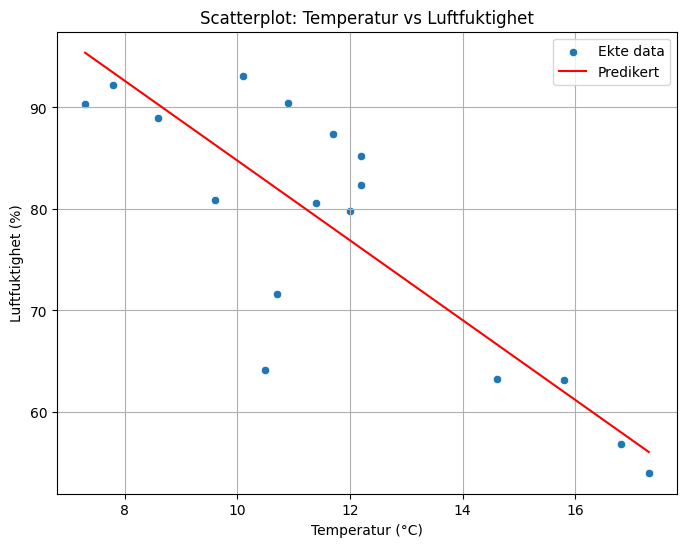

In [104]:
# Scatterplot med regresjonslinje
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test['temperatur'], y=y_test, label='Ekte data')
sns.lineplot(x=X_test['temperatur'], y=y_pred, color='red', label='Predikert')
plt.title('Scatterplot: Temperatur vs Luftfuktighet')
plt.xlabel('Temperatur (°C)')
plt.ylabel('Luftfuktighet (%)')
plt.legend()
plt.grid(True)
plt.show()


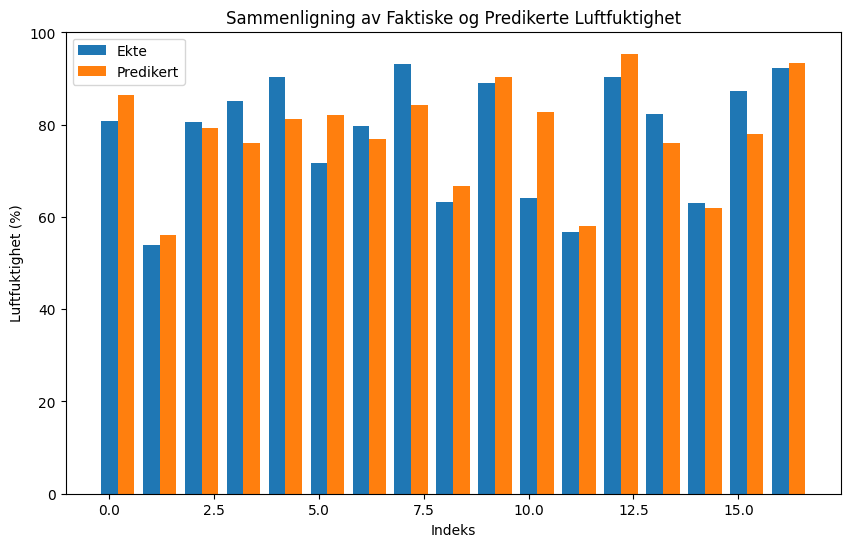

In [105]:
# Søylediagram Faktiske vs Predikerte verdier
plt.figure(figsize=(10, 6))
width = 0.4
indices = np.arange(len(y_test))
plt.bar(indices, y_test, width=width, label='Ekte')
plt.bar(indices + width, y_pred, width=width, label='Predikert')
plt.title('Sammenligning av Faktiske og Predikerte Luftfuktighet')
plt.xlabel('Indeks')
plt.ylabel('Luftfuktighet (%)')
plt.legend()
plt.show()


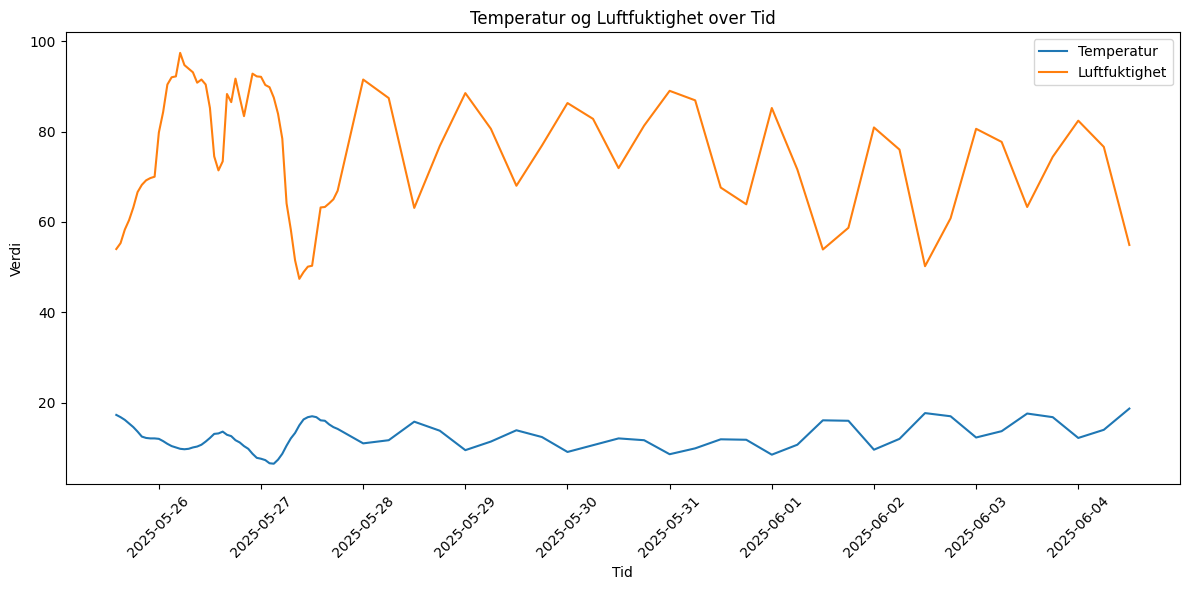

In [106]:
# Konverter og sorter etter tid
full_data['time'] = pd.to_datetime(full_data['time'])
full_data.sort_values('time', inplace=True)

# Linjediagram over Tid
plt.figure(figsize=(12, 6))
plt.plot(full_data['time'], full_data['temperatur'], label='Temperatur')
plt.plot(full_data['time'], full_data['luftfuktighet'], label='Luftfuktighet')
plt.title('Temperatur og Luftfuktighet over Tid')
plt.xlabel('Tid')
plt.ylabel('Verdi')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


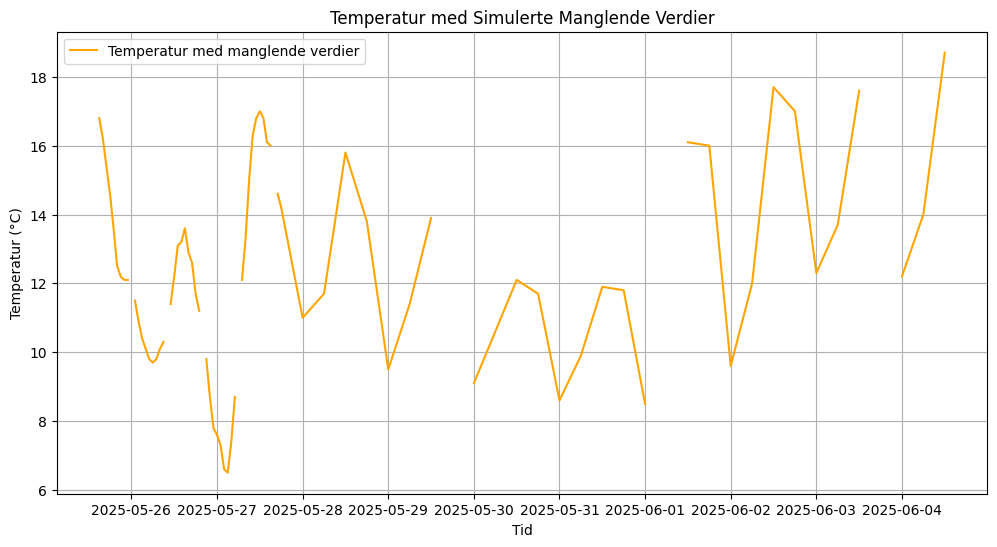

In [107]:
# Demonstrasjon: Manglende verdier-effekt
full_data_missing = full_data.copy()
full_data_missing.loc[::10, 'temperatur'] = np.nan

plt.figure(figsize=(12, 6))
plt.plot(full_data_missing['time'], full_data_missing['temperatur'], label='Temperatur med manglende verdier', color='orange')
plt.title('Temperatur med Simulerte Manglende Verdier')
plt.xlabel('Tid')
plt.ylabel('Temperatur (°C)')
plt.legend()
plt.grid(True)
plt.show()


In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Uavhengig og avhengig variabel
X = full_data[['temperatur']]
y = full_data['luftfuktighet']

# Splitt i trenings- og testsett
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Trener lineær regresjonsmodell
model = LinearRegression()
model.fit(X_train, y_train)

# Lager prediksjoner
y_pred = model.predict(X_test)

# Evaluerer modellen
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Modellresultater")
print(f" - Mean Squared Error (MSE): {mse:.2f}")
print(f" - R-squared (R²): {r2:.2f}")

# Eksempel: Vis noen prediksjoner
results_df = X_test.copy()
results_df['Faktisk luftfuktighet'] = y_test.values
results_df['Predikert luftfuktighet'] = y_pred
print(results_df.head())


Modellresultater
 - Mean Squared Error (MSE): 53.85
 - R-squared (R²): 0.67
    temperatur  Faktisk luftfuktighet  Predikert luftfuktighet
73         9.6                   80.9                86.347954
0         17.3                   54.0                56.047707
58        11.4                   80.6                79.264779
22        12.2                   85.2                76.116702
12        10.9                   90.4                81.232328


## Modellering og Evaluering

Vi bruker en enkel lineær regresjonsmodell for å predikere luftfuktighet basert på temperatur.

Modellen trenes på 80 % av dataene, og testes på de resterende 20 %.

Vi evaluerer modellen med:
- **MSE (Mean Squared Error):** Gjennomsnittlig kvadratisk avvik mellom faktisk og predikert verdi. Om MSE-verdien vi fremviser tyder på god eller dårlig nøyaktighet, avhenger av spennet i dataene den tar for seg. I dette tilfellet bruker vi MSE for å analysere de predikerte verdiene for luftfuktighet. Dermed kan vi estimere at en MSE-verdi på rundt 1 - 20 er relativt bra, men høyere enn det begynner å tyde på et merkbart avvik. 

- **R² (R-squared):** Andel av variasjon i dataene som modellen forklarer. Vi anser her en verdi over 0.7 som en pålitelig regresjon. Dette fordi en lineær regresjon i denne sammenheng kan vise korrelasjon selv hvis dataene ikke har noen årsakssammenheng. Fordelen med en slik regresjonsmodell er at vi unngår modeller som prioriterer R-squared verdi framfor en realistisk og pålitelig regresjonsmodell som ellers ville vært upålitelig dersom tidsrommet i målingene skulle endres. Dette kan typisk skje med en polynom regresjon av for høy grad. Vi anser også at verdier under 0.7 vil hinte om at korrelasjonen er spuriøs, og at regresjonsmodellen derfor ikke har gitt en pålitelig prediksjon.

Vi har tatt i nytte scatterplot, søylediagram og linjediagram for visualisering av endringer i luftfuktighet og temperaturer over tid.
- Scatterplot er det mest åpenbare valget for å enkelt visualisere implementeringen av lineær regresjon. Det er også et utmerket diagram for å visualisere én variabel uttrykt ved en annen.
- Søylediagrammet bruker vi for å visualisere faktiske og predikerte verdier for luftfuktighet over gitt tidsperiode. Dette grunnes av at søylediagram egner seg svært godt for å vise forskjell mellom datasett for en mengde punkter, slik vi ser i diagrammet ovenfor.
- Linjedigrammet bruker vi for å sammenligne temperatur og luftfuktighet over tid. Dette er fordi diagrammet er godt tilpasset en slik sammenligning, ettersom endringen i verdiene over tidsperioden visualiseres på en måte som gjør det enkelt å tolke. Man kan tydelig se endringene mellom datapunktene over tidsrammen, og hvordan de utvikler seg i forhold til hverandre.
